In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\Gourav\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


In [4]:
df = pd.read_csv("electricity_cost_dataset.csv")
df.head(5)

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [6]:
df['structure type'].value_counts()

structure type
Residential    3939
Commercial     3005
Mixed-use      2052
Industrial     1004
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [7]:
df.describe()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


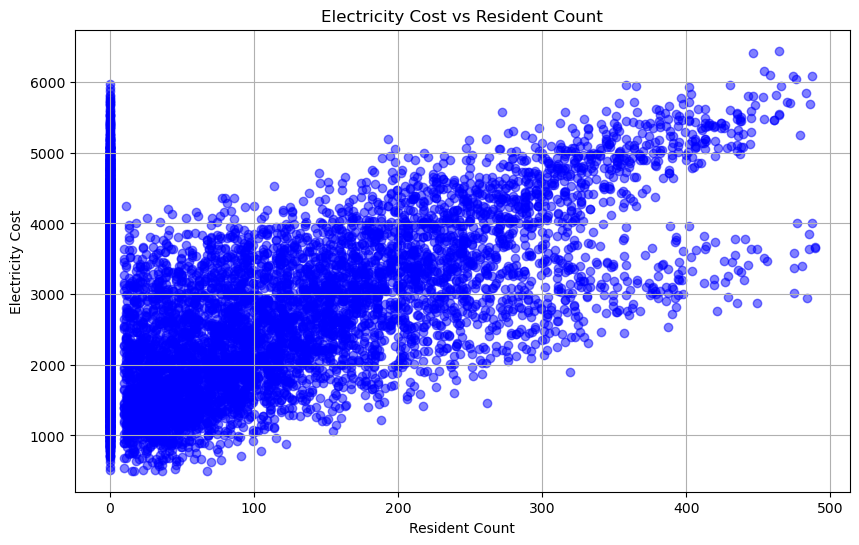

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['resident count'],df['electricity cost'], alpha=0.5, color='blue')
plt.title('Electricity Cost vs Resident Count')
plt.xlabel('Resident Count')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

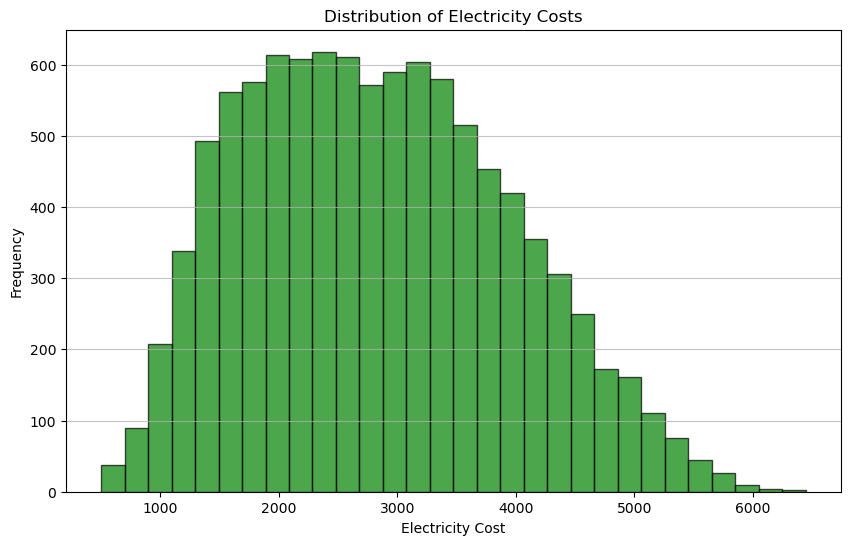

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df['electricity cost'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Electricity Costs')
plt.xlabel('Electricity Cost')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [14]:
average_electricity_cost_by_structure = df.groupby('structure type')['electricity cost'].mean()
average_electricity_cost_by_structure

structure type
Commercial     2812.206988
Industrial     3397.109562
Mixed-use      2304.945906
Residential    2992.465347
Name: electricity cost, dtype: float64

The average electricity costs by structure type are as follows:

1. Commercial: 2812.21
2. Industrial: 3397.11
3. Mixed-use: 2304.95
4. Residential: 2992.47

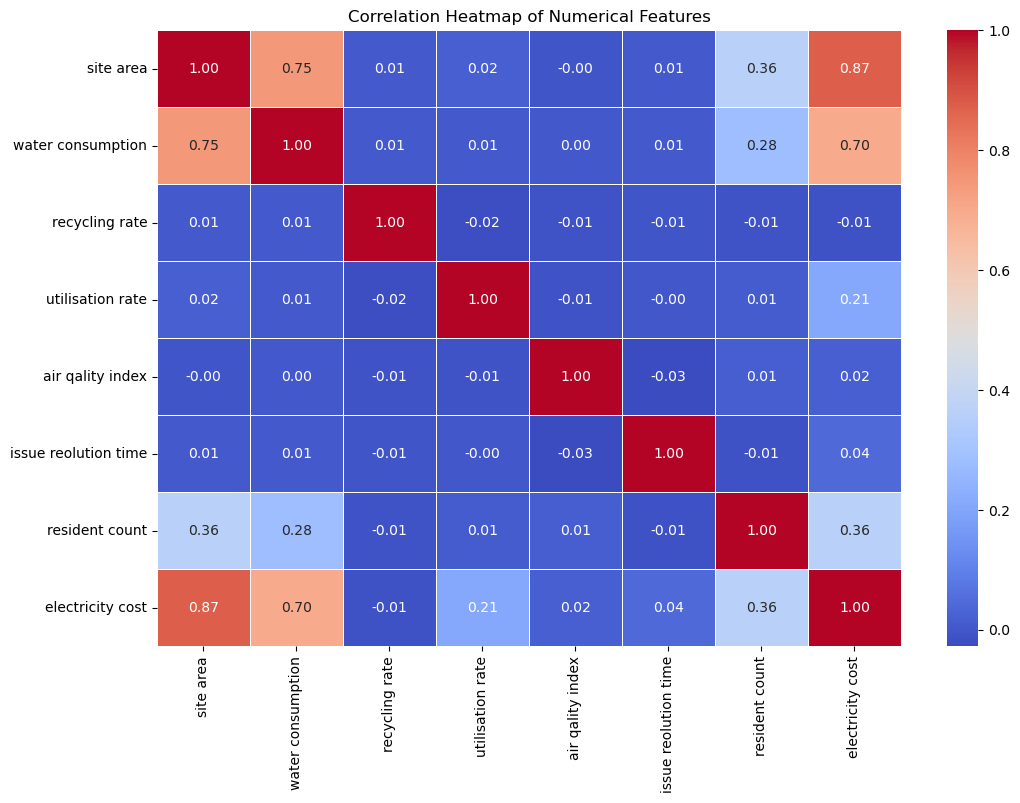

In [16]:
# Correcting the error by defining numerical_features from the dataset
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Now calculating the correlation matrix
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

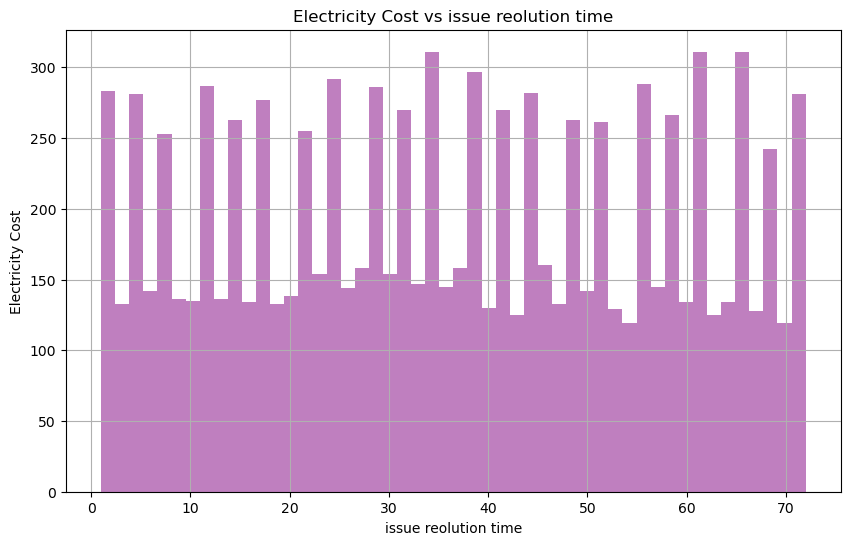

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['issue reolution time'], alpha=0.5, color='purple',bins=50)
plt.title('Electricity Cost vs issue reolution time')
plt.xlabel('issue reolution time')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

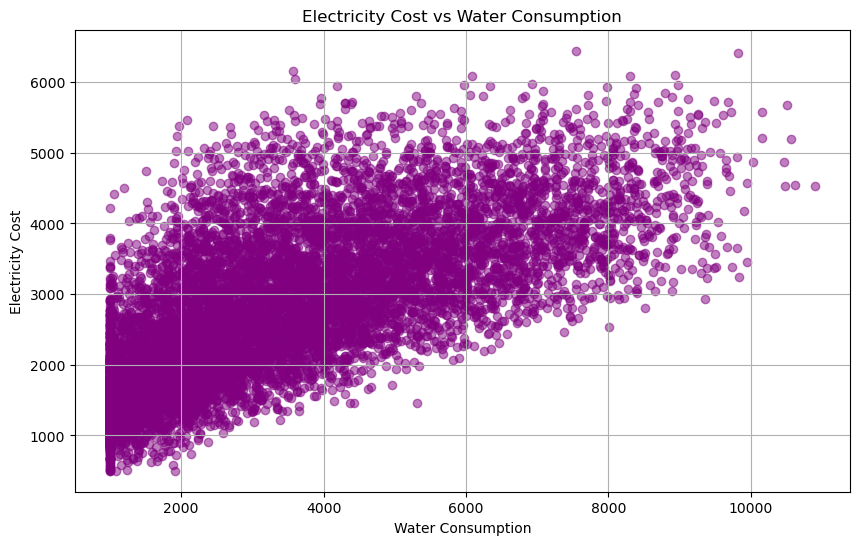

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['water consumption'], df['electricity cost'], alpha=0.5, color='purple')
plt.title('Electricity Cost vs Water Consumption')
plt.xlabel('Water Consumption')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

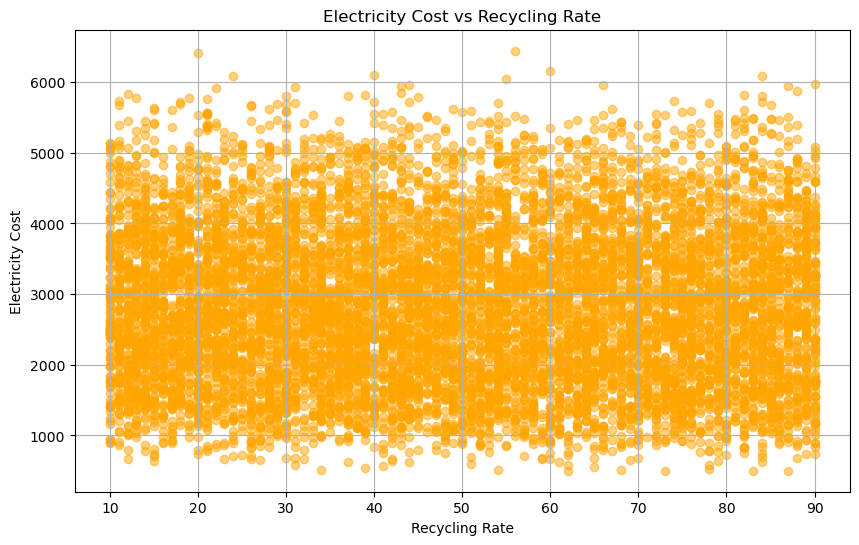

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['recycling rate'], df['electricity cost'], alpha=0.5, color='orange')
plt.title('Electricity Cost vs Recycling Rate')
plt.xlabel('Recycling Rate')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

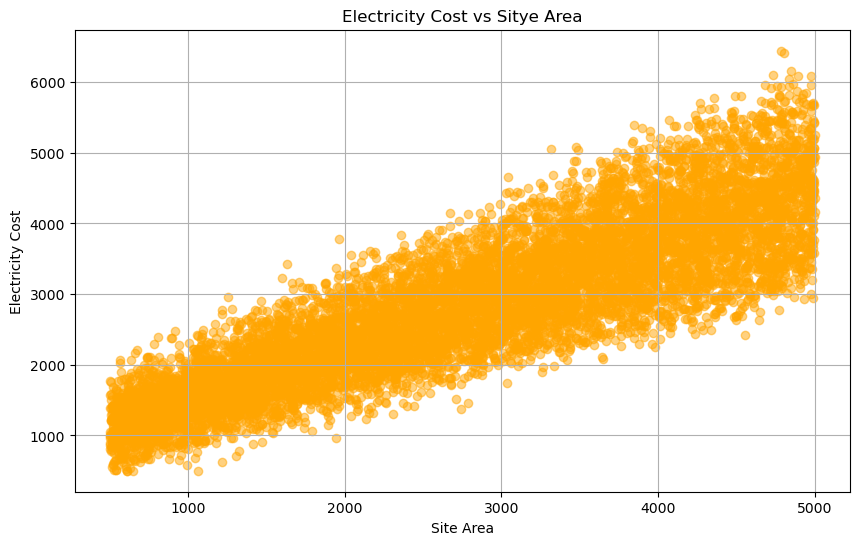

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['site area'], df['electricity cost'], alpha=0.5, color='orange')
plt.title('Electricity Cost vs Sitye Area')
plt.xlabel('Site Area')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

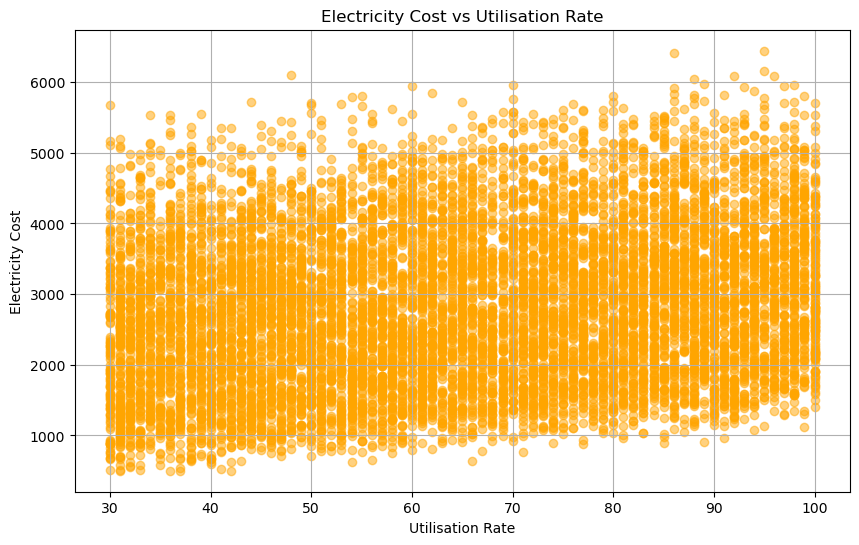

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['utilisation rate'], df['electricity cost'], alpha=0.5, color='orange')
plt.title('Electricity Cost vs Utilisation Rate')
plt.xlabel('Utilisation Rate')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

Splitting data

In [32]:
# Define features and target variable
X = df.drop(columns=['electricity cost'])
y = df['electricity cost']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 8), (3000, 8), (7000,), (3000,))

In [34]:
df.head(5)

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


LINEAR REGRESSION

In [35]:
# Define the column transformer for preprocessing
categorical_features = ['structure type']
numerical_features = ['site area', 'water consumption', 'resident count','recycling rate','utilisation rate','air qality index','issue reolution time']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print('rmse :',rmse)
print('r2 :',r2)
print('mae :',mae)

rmse : 311.6322666779044
r2 : 0.9201071581355686
mae : 246.44756214313148


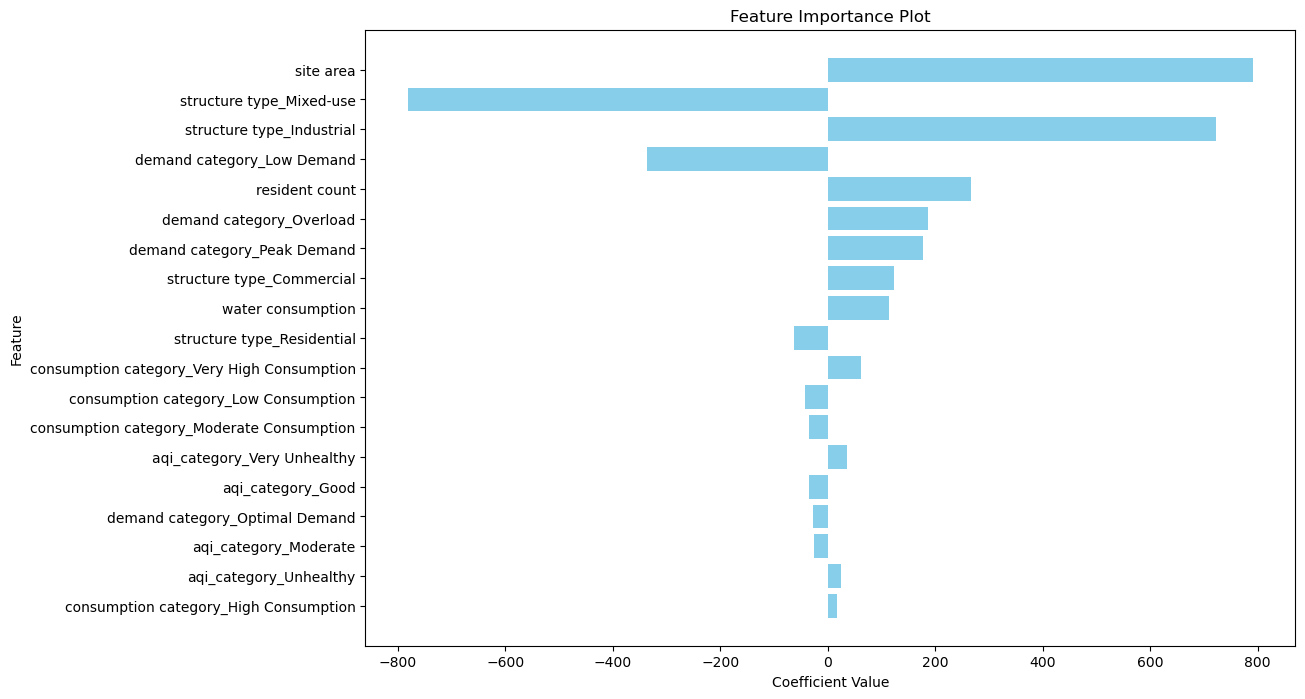

In [24]:
# Extract feature names after preprocessing
feature_names = numerical_features + list(model.named_steps['preprocessor']
                                          .named_transformers_['cat']
                                          .get_feature_names_out(categorical_features))

# Extract coefficients from the linear regression model
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort by absolute importance
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()


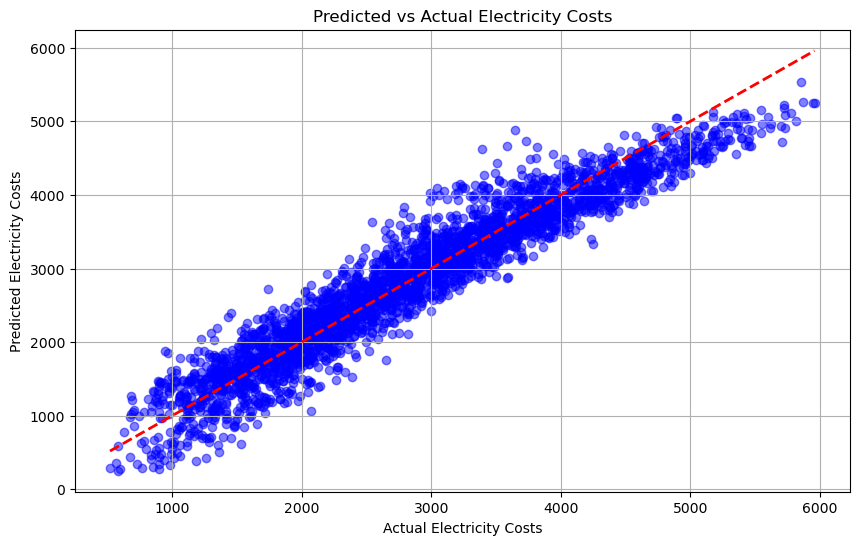

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Electricity Costs')
plt.xlabel('Actual Electricity Costs')
plt.ylabel('Predicted Electricity Costs')
plt.grid(True)
plt.show()

RANDOM FOREST REGRESSOR

In [26]:
# Create a new pipeline with RandomForestRegressor
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the RandomForest model
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
rf_r2 = r2_score(y_test, y_rf_pred)
rf_mae = mean_absolute_error(y_test, y_rf_pred)

print('rf_rmse :',rf_rmse)
print('rf_r2 :',rf_r2)
print('rf_mae :',rf_mae)

rf_rmse : 243.1521447507712
rf_r2 : 0.9513616042688259
rf_mae : 194.49380999999997


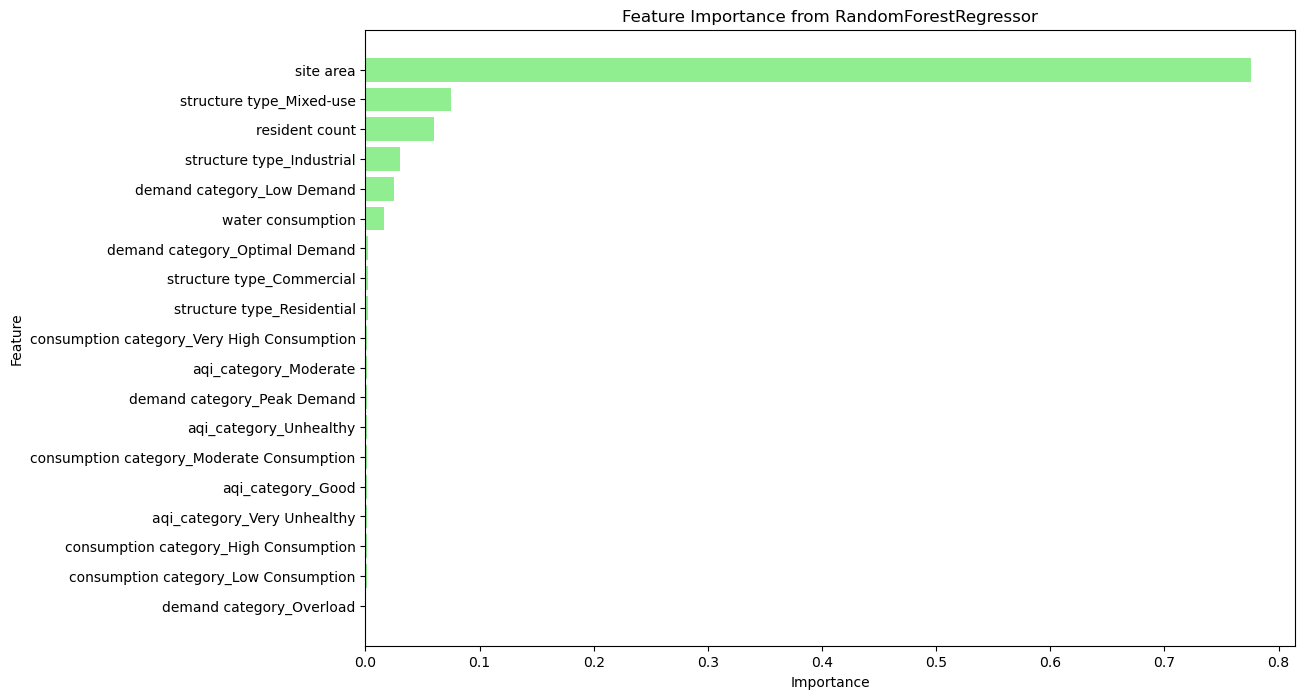

In [27]:
# Extract feature importances from the RandomForestRegressor model
rf_feature_importances = rf_model.named_steps['regressor'].feature_importances_

# Create a DataFrame for feature importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importances
})

# Sort by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForestRegressor')
plt.gca().invert_yaxis()
plt.show()

SVM MODELLING

In [28]:
# Create a new pipeline with Support Vector Regressor
svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Train the SVR model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_svr_pred = svr_model.predict(X_test)

# Evaluate the SVR model
svr_rmse = np.sqrt(mean_squared_error(y_test, y_svr_pred))
svr_r2 = r2_score(y_test, y_svr_pred)
svr_mae = mean_absolute_error(y_test, y_svr_pred)

svr_rmse, svr_r2, svr_mae

(791.1763689161886, 0.4850445641732448, 619.2172963938691)

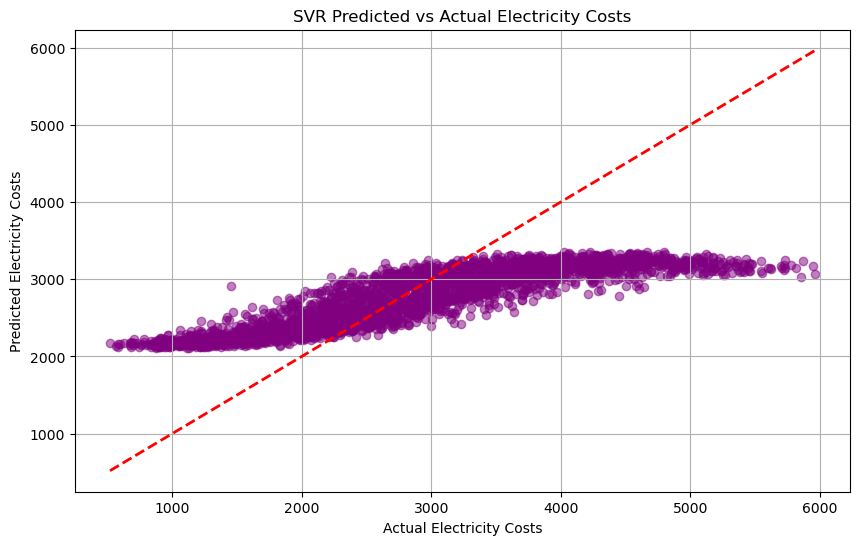

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_svr_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('SVR Predicted vs Actual Electricity Costs')
plt.xlabel('Actual Electricity Costs')
plt.ylabel('Predicted Electricity Costs')
plt.grid(True)
plt.show()

In [30]:
# Create a summary report comparing the performance of the three models
summary_report = f"""
Model Performance Comparison:

Linear Regression:
- RMSE: {rmse:.2f}
- R-squared: {r2:.3f}
- MAE: {mae:.2f}

Random Forest Regressor:
- RMSE: {rf_rmse:.2f}
- R-squared: {rf_r2:.3f}
- MAE: {rf_mae:.2f}

Support Vector Regressor (SVR):
- RMSE: {svr_rmse:.2f}
- R-squared: {svr_r2:.3f}
- MAE: {svr_mae:.2f}

Best Model: Random Forest Regressor (highest R-squared and lowest RMSE/MAE)
"""
print(summary_report)


Model Performance Comparison:

Linear Regression:
- RMSE: 323.74
- R-squared: 0.914
- MAE: 257.64

Random Forest Regressor:
- RMSE: 243.15
- R-squared: 0.951
- MAE: 194.49

Support Vector Regressor (SVR):
- RMSE: 791.18
- R-squared: 0.485
- MAE: 619.22

Best Model: Random Forest Regressor (highest R-squared and lowest RMSE/MAE)



In [41]:
# Define the parameter grid for hyperparameter tuning of RandomForestRegressor
rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create a new pipeline for GridSearchCV
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Perform GridSearchCV for RandomForestRegressor
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score for RandomForestRegressor
rf_best_params = rf_grid_search.best_params_
rf_best_score = -rf_grid_search.best_score_

rf_best_params, rf_best_score

KeyboardInterrupt: 